# Assignment 1: Data Analytics Laboratory EE4708
## Linear Regression
#### Madhur Jindal | ME18B059

## Reading the data into pandas dataframes

In [94]:
# Importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns

In [95]:
#reading the dataset
dataset = pd.read_excel('merged_data.xlsx',index_col=0)

In [96]:
# Visualizing the data
dataset.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,...,F_Without,All_With,All_Without,fips_x,Incidence_Rate,Avg_Ann_Incidence,recent_trend,fips_y,Mortality_Rate,Avg_Ann_Deaths
0,AK,"Aleutians East Borough, Alaska",553,334,219,2013,61518.0,72639.0,31250.0,54750.0,...,540,1442,1857,2013,*,3 or fewer,*,2013,*,*
1,AK,"Aleutians West Census Area, Alaska",499,273,226,2016,84306.0,97321.0,93750.0,48750.0,...,564,4177,1333,2016,*,3 or fewer,*,2016,*,*
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,87235.0,50535.0,53935.0,...,21393,243173,44638,2020,61.5,131,stable,2020,47.3,96
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,92647.0,73661.0,41594.0,...,1774,13023,4482,2050,62.7,6,stable,2050,58.3,5
4,AK,"Bristol Bay Borough, Alaska",69,33,36,2060,79750.0,88000.0,NaN,63333.0,...,67,768,191,2060,*,3 or fewer,*,2060,*,*


## Preprocessing and Data Cleaning

In [97]:
dataset.columns

Index(['State', 'AreaName', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'FIPS',
       'Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without', 'fips_x',
       'Incidence_Rate', 'Avg_Ann_Incidence', 'recent_trend', 'fips_y',
       'Mortality_Rate', 'Avg_Ann_Deaths'],
      dtype='object')

In [98]:
# Dropping unwanted columns
dataset.drop(['fips_x', 'fips_y'], axis = 1, inplace=True)

In [99]:
dataset.columns

Index(['State', 'AreaName', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'FIPS',
       'Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without',
       'Incidence_Rate', 'Avg_Ann_Incidence', 'recent_trend', 'Mortality_Rate',
       'Avg_Ann_Deaths'],
      dtype='object')

In [100]:
dataset.shape

(3134, 23)

In [101]:
#checking the number of null values in each of the features
dataset.isnull().sum()

State                   0
AreaName                0
All_Poverty             0
M_Poverty               0
F_Poverty               0
FIPS                    0
Med_Income              1
Med_Income_White        2
Med_Income_Black     1210
Med_Income_Nat_Am    1660
Med_Income_Asian     1757
Hispanic              681
M_With                  0
M_Without               0
F_With                  0
F_Without               0
All_With                0
All_Without             0
Incidence_Rate          0
Avg_Ann_Incidence       0
recent_trend            0
Mortality_Rate          0
Avg_Ann_Deaths          0
dtype: int64

We see the columns with Med Income Black, Native american, Asian have too many missing values hence we tend to remove these columns.

In [102]:
fin_df = dataset.copy()

In [103]:
# Total Mean of the Median income for different communities
fin_df[['Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic']].mean()

Med_Income           46819.837855
Med_Income_White     49490.181992
Med_Income_Black     34750.214137
Med_Income_Nat_Am    43309.998643
Med_Income_Asian     65412.969499
Hispanic             41118.231553
dtype: float64

<AxesSubplot:title={'center':'Lineplot Median Income by state for different communities'}, xlabel='State', ylabel='Median Income'>

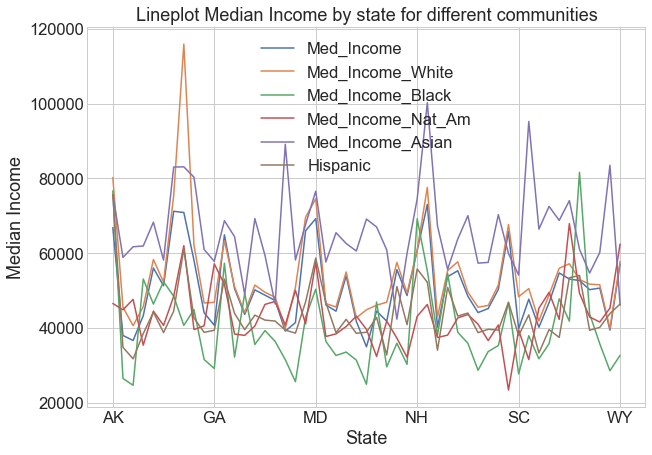

In [104]:
# A lineplot of the mean of the median incomes of the different communities grouped by state
grpb = fin_df.groupby('State')[['Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic']].mean()
grpb.plot.line(ylabel = 'Median Income', title = 'Lineplot Median Income by state for different communities', figsize = (10, 7))

We can see that the different social group have different mean incomes for different states, hence if we can prove that the median income is a valid factor determining the Avg Ann Incidence or Deaths, then we can also assume that social status would also be a valid factor !

In [105]:
#Dropping the following columns
fin_df.drop(['Med_Income_White', 'Med_Income_Black', 'Med_Income_Nat_Am',
             'Med_Income_Asian', 'Hispanic'], axis=1, inplace=True)

In [106]:
# Checks what all columns in the dataframe contain only numeric values
fin_df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

State                False
AreaName             False
All_Poverty           True
M_Poverty             True
F_Poverty             True
FIPS                  True
Med_Income           False
M_With                True
M_Without             True
F_With                True
F_Without             True
All_With              True
All_Without           True
Incidence_Rate       False
Avg_Ann_Incidence    False
recent_trend         False
Mortality_Rate       False
Avg_Ann_Deaths       False
dtype: bool

In [107]:
#this will give us info about the columns that only contain numeric of null values
fin_df.describe()

,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without
count,3.134000e+03,3134.000000,3134.000000,3134.000000,3133.000000,3.134000e+03,3134.000000,3.134000e+03,3134.000000,3.134000e+03,3.134000e+03
mean,1.522966e+04,6828.800893,8400.855775,30426.019145,46819.837855,4.158963e+04,6930.955329,4.487357e+04,5968.701021,8.646320e+04,1.289966e+04
std,5.457122e+04,24719.078097,29865.855831,15124.491165,12246.380184,1.293894e+05,28686.089548,1.406455e+05,24657.276997,2.699985e+05,5.331494e+04
min,1.000000e+01,5.000000,5.000000,1001.000000,19328.000000,3.200000e+01,4.000000,3.300000e+01,4.000000,6.700000e+01,8.000000e+00
25%,1.731250e+03,758.750000,957.000000,19001.500000,38826.000000,4.506750e+03,750.000000,4.657500e+03,633.000000,9.173500e+03,1.388250e+03
50%,4.294000e+03,1925.000000,2372.000000,29180.000000,45075.000000,1.040450e+04,1763.000000,1.110800e+04,1529.000000,2.144800e+04,3.323500e+03
75%,1.034550e+04,4697.500000,5812.500000,45080.500000,52224.000000,2.788775e+04,4407.250000,2.976475e+04,3834.000000,5.756150e+04,8.240000e+03
max,1.800265e+06,823612.000000,976653.000000,56045.000000,123453.000000,3.904322e+06,997326.000000,4.230137e+06,837175.000000,8.134459e+06,1.834501e+06


Thus we can see we have to treat the columns [Incidence_Rate, Avg_Ann_Incidence, recent_trend, Mortality_Rate, Avg_Ann_Deaths] for values that are not numeric.

#### Here as we can see, all the independent columns are not normalized by population and we also do not have population data, it is better to delete the Mortality rate and Incidence rate columns as these are just the average values normalized by population and hence can be dropped !!

In [108]:
fin_df.drop(['Mortality_Rate', 'Incidence_Rate'], axis = 1, inplace = True)

In [109]:
# checking for other data than numeric.
[i for i in fin_df['Avg_Ann_Incidence'].unique() if type(i)==str]

['3 or fewer', '_', '__']

On examining, we can see values with '3 or fewer' , _ and '__'

In [110]:
[i for i in fin_df['recent_trend'].unique() if type(i)==str]

['*', 'stable', 'falling', 'rising', '_', '__']

In [111]:
[i for i in fin_df['Avg_Ann_Deaths'].unique() if type(i)==str]

['*']

In [112]:
# Checks for the number of datapoints without numeric data
def f_(x):
    strs = []
    for _, i in enumerate(x):
        try:
            pd.to_numeric(i)
        except:
            strs.append(i)
    print(pd.Series(strs).value_counts())

In [113]:
f_(fin_df['Avg_Ann_Deaths'])

*    325
dtype: int64


We can see 325 datapoints with an asterisk. We can see from the explanation csv that it represents data that has been suppressed due to confidentiality when fewer than 16 cases were reported. So we have two options here, either to delete these row or impute them with the means of each of states they correspond to ! But as this data is not a large fraction of the data we can just delete it !!

In [114]:
# which states are associated with the "*"
fin_df.loc[fin_df.Avg_Ann_Deaths=='*', 'State'].value_counts()

TX    56
NE    37
KS    36
SD    31
ND    30
CO    24
MT    21
ID    15
UT    12
AK    11
GA     8
NM     7
MN     5
OK     5
NV     5
VA     3
OR     3
CA     3
IA     2
WA     2
WY     2
KY     1
MO     1
PA     1
HI     1
MI     1
MS     1
WI     1
Name: State, dtype: int64

In [115]:
f_(fin_df['Avg_Ann_Incidence'])

3 or fewer    211
_             192
__             17
dtype: int64


Here we convert the '3 or fewer' to 3 and the others to Nan values

In [116]:
f_(fin_df['Med_Income'])

Series([], dtype: int64)


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':


In [117]:
# we create a filter to convert the non-numeric data to either numeric or to replace by NULL
def filter_(x):
    try:
        return float(str(x).split(' ')[0])
    except ValueError:
        return float('NaN')

In [118]:
# Using the filter on different columns
fin_df['Avg_Ann_Incidence'] = fin_df['Avg_Ann_Incidence'].map(filter_)

fin_df['Avg_Ann_Deaths'] = fin_df['Avg_Ann_Deaths'].map(filter_)
fin_df['Med_Income'] = fin_df['Med_Income'].map(filter_)

In [119]:
print([i for i in fin_df['Avg_Ann_Incidence'].unique() if type(i)==str])
print([i for i in fin_df['Avg_Ann_Deaths'].unique() if type(i)==str])
#print([i for i in fin_df['recent_trend'].unique() if type(i)==str])

[]
[]


In [120]:
# creating columns with Rising and falling !!

def boo(col, chck):
    if col == chck:
        return 1
    return 0

fin_df['Rising'] = fin_df['recent_trend'].apply(lambda x: boo(x, 'rising'))
fin_df['Falling'] = fin_df['recent_trend'].apply(lambda x: boo(x, 'falling'))

In [121]:
fin_df.select_dtypes(include=np.number)

,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Avg_Ann_Incidence,Avg_Ann_Deaths,Rising,Falling
0,553,334,219,2013,61518.0,876,1317,566,540,1442,1857,3.0,NaN,0,0
1,499,273,226,2016,84306.0,2470,769,1707,564,4177,1333,3.0,NaN,0,0
2,23914,10698,13216,2020,78326.0,120747,23245,122426,21393,243173,44638,131.0,96.0,0,0
3,4364,2199,2165,2050,51012.0,6396,2708,6627,1774,13023,4482,6.0,5.0,0,0
4,69,33,36,2060,79750.0,419,124,349,67,768,191,3.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,5058,2177,2881,56037,69022.0,19891,3318,18600,2683,38491,6001,14.0,9.0,0,0
3130,1638,1026,612,56039,75325.0,8948,2558,9555,1192,18503,3750,5.0,5.0,0,0
3131,2845,1453,1392,56041,56569.0,9132,1413,8711,1503,17843,2916,6.0,4.0,0,0
3132,1137,489,648,56043,47652.0,3349,691,3490,703,6839,1394,6.0,5.0,0,0


In [122]:
#checking for null values post the pre-processing
fin_df.isnull().sum()

State                  0
AreaName               0
All_Poverty            0
M_Poverty              0
F_Poverty              0
FIPS                   0
Med_Income             1
M_With                 0
M_Without              0
F_With                 0
F_Without              0
All_With               0
All_Without            0
Avg_Ann_Incidence    209
recent_trend           0
Avg_Ann_Deaths       325
Rising                 0
Falling                0
dtype: int64

In [123]:
fin_df.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Avg_Ann_Incidence,recent_trend,Avg_Ann_Deaths,Rising,Falling
0,AK,"Aleutians East Borough, Alaska",553,334,219,2013,61518.0,876,1317,566,540,1442,1857,3.0,*,NaN,0,0
1,AK,"Aleutians West Census Area, Alaska",499,273,226,2016,84306.0,2470,769,1707,564,4177,1333,3.0,*,NaN,0,0
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,120747,23245,122426,21393,243173,44638,131.0,stable,96.0,0,0
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,6396,2708,6627,1774,13023,4482,6.0,stable,5.0,0,0
4,AK,"Bristol Bay Borough, Alaska",69,33,36,2060,79750.0,419,124,349,67,768,191,3.0,*,NaN,0,0


In [124]:
#Checking for mean values for different features, grouped by state
fin_df.groupby(['State']).mean()

,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Avg_Ann_Incidence,Avg_Ann_Deaths,Rising,Falling
State,,,,,,,,,,,,,,,
AK,2978.782609,1425.260870,1553.521739,2138.217391,66812.565217,12366.565217,2917.739130,12147.608696,2411.217391,24514.173913,5328.956522,15.130435,19.833333,0.000000,0.000000
AL,13242.686567,5740.791045,7501.895522,1067.000000,37973.134328,29389.671642,4678.328358,32530.134328,4294.194030,61919.805970,8972.522388,59.597015,47.552239,0.000000,0.074627
AR,7381.920000,3303.280000,4078.640000,5075.000000,36626.480000,16012.226667,2881.893333,17237.906667,2603.880000,33250.133333,5485.773333,35.733333,28.546667,0.000000,0.040000
AZ,78712.666667,36501.133333,42211.533333,4013.866667,43252.200000,178389.533333,35436.066667,191685.466667,30056.200000,370075.000000,65492.266667,252.600000,182.666667,0.066667,0.133333
CA,105778.310345,48712.758621,57065.551724,6058.000000,56013.155172,269831.241379,52388.275862,287728.534483,43712.500000,557559.775862,96100.775862,294.396552,231.818182,0.000000,0.258621
CO,10218.265625,4729.312500,5488.953125,8062.234375,51263.187500,34745.546875,5534.781250,36322.625000,4447.265625,71068.171875,9982.046875,35.281250,39.075000,0.015625,0.062500
CT,45793.875000,20125.000000,25668.875000,9008.000000,71184.125000,194827.125000,19867.500000,212544.125000,15086.125000,407371.250000,34953.625000,332.875000,216.875000,0.000000,0.375000
DC,110365.000000,48069.000000,62296.000000,11001.000000,70848.000000,276285.000000,22198.000000,323314.000000,14813.000000,599599.000000,37011.000000,351.000000,240.000000,0.000000,0.000000
DE,36105.000000,15373.000000,20732.000000,10003.000000,58067.666667,132112.666667,13828.000000,146781.000000,11207.666667,278893.666667,25035.666667,257.666667,188.333333,0.000000,0.000000


In [125]:
# Creating a correlation matrix to check for the correlation between different columns
fin_df.corr()

,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Avg_Ann_Incidence,Avg_Ann_Deaths,Rising,Falling
All_Poverty,1.000000,0.999696,0.999792,-0.059265,0.121617,0.957627,0.970175,0.961131,0.959671,0.959581,0.965834,0.901260,0.911911,-0.019629,0.269978
M_Poverty,0.999696,1.000000,0.998986,-0.060504,0.120250,0.957438,0.971202,0.960465,0.960657,0.959144,0.966843,0.898099,0.909497,-0.019341,0.269447
F_Poverty,0.999792,0.998986,1.000000,-0.058212,0.122692,0.957343,0.968879,0.961240,0.958413,0.959502,0.964556,0.903467,0.913488,-0.019858,0.270294
FIPS,-0.059265,-0.060504,-0.058212,1.000000,0.069289,-0.057703,-0.051458,-0.057880,-0.048607,-0.057803,-0.050167,-0.071399,-0.060881,0.010595,-0.006330
Med_Income,0.121617,0.120250,0.122692,0.069289,1.000000,0.261679,0.141092,0.255890,0.135189,0.258699,0.138437,0.241756,0.235420,-0.010574,0.145025
M_With,0.957627,0.957438,0.957343,-0.057703,0.261679,1.000000,0.942191,0.999459,0.928710,0.999853,0.936459,0.949095,0.953423,-0.021823,0.307680
M_Without,0.970175,0.971202,0.968879,-0.051458,0.141092,0.942191,1.000000,0.941427,0.997856,0.941920,0.999542,0.858194,0.871616,-0.018979,0.261397
F_With,0.961131,0.960465,0.961240,-0.057880,0.255890,0.999459,0.941427,1.000000,0.927356,0.999876,0.935421,0.953351,0.957293,-0.022058,0.307576
F_Without,0.959671,0.960657,0.958413,-0.048607,0.135189,0.928710,0.997856,0.927356,1.000000,0.928130,0.999380,0.842368,0.856068,-0.019055,0.259156
All_With,0.959581,0.959144,0.959502,-0.057803,0.258699,0.999853,0.941920,0.999876,0.928130,1.000000,0.936045,0.951440,0.955570,-0.021948,0.307668


In [126]:
# Using the describe method for the dataframe
fin_df.describe()

,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Avg_Ann_Incidence,Avg_Ann_Deaths,Rising,Falling
count,3.134000e+03,3134.000000,3134.000000,3134.000000,3133.000000,3.134000e+03,3134.000000,3.134000e+03,3134.000000,3.134000e+03,3.134000e+03,2925.000000,2809.000000,3134.000000,3134.000000
mean,1.522966e+04,6828.800893,8400.855775,30426.019145,46819.837855,4.158963e+04,6930.955329,4.487357e+04,5968.701021,8.646320e+04,1.289966e+04,71.079316,55.822357,0.013720,0.063178
std,5.457122e+04,24719.078097,29865.855831,15124.491165,12246.380184,1.293894e+05,28686.089548,1.406455e+05,24657.276997,2.699985e+05,5.331494e+04,172.803924,127.709719,0.116347,0.243322
min,1.000000e+01,5.000000,5.000000,1001.000000,19328.000000,3.200000e+01,4.000000,3.300000e+01,4.000000,6.700000e+01,8.000000e+00,3.000000,3.000000,0.000000,0.000000
25%,1.731250e+03,758.750000,957.000000,19001.500000,38826.000000,4.506750e+03,750.000000,4.657500e+03,633.000000,9.173500e+03,1.388250e+03,11.000000,10.000000,0.000000,0.000000
50%,4.294000e+03,1925.000000,2372.000000,29180.000000,45075.000000,1.040450e+04,1763.000000,1.110800e+04,1529.000000,2.144800e+04,3.323500e+03,25.000000,21.000000,0.000000,0.000000
75%,1.034550e+04,4697.500000,5812.500000,45080.500000,52224.000000,2.788775e+04,4407.250000,2.976475e+04,3834.000000,5.756150e+04,8.240000e+03,60.000000,48.000000,0.000000,0.000000
max,1.800265e+06,823612.000000,976653.000000,56045.000000,123453.000000,3.904322e+06,997326.000000,4.230137e+06,837175.000000,8.134459e+06,1.834501e+06,3701.000000,2876.000000,1.000000,1.000000


In [127]:
#Converting the Median Income column to numeric type
fin_df['Med_Income'] = pd.to_numeric(fin_df.Med_Income) 

In [128]:
# Checks what all columns in the dataframe contain only numeric values
fin_df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

State                False
AreaName             False
All_Poverty           True
M_Poverty             True
F_Poverty             True
FIPS                  True
Med_Income           False
M_With                True
M_Without             True
F_With                True
F_Without             True
All_With              True
All_Without           True
Avg_Ann_Incidence    False
recent_trend         False
Avg_Ann_Deaths       False
Rising                True
Falling               True
dtype: bool

### We wont be doing anything with the null values we have created as out library Statsmodels can handle missing data !

## Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Scatter Plot'}, xlabel='Avg_Ann_Incidence', ylabel='Avg_Ann_Deaths'>

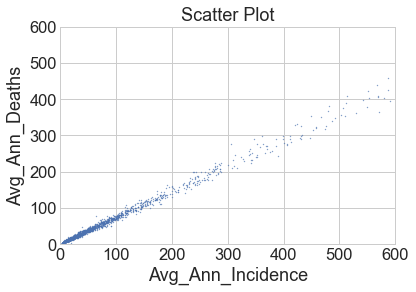

In [129]:
# Scatter plot Avg_Ann_Incidence vs Avg_Ann_Deaths
fin_df.plot(x = 'Avg_Ann_Incidence', y = 'Avg_Ann_Deaths', kind= 'scatter', s=0.1, xlim=[0, 600], ylim=[0, 600], title = 'Scatter Plot')

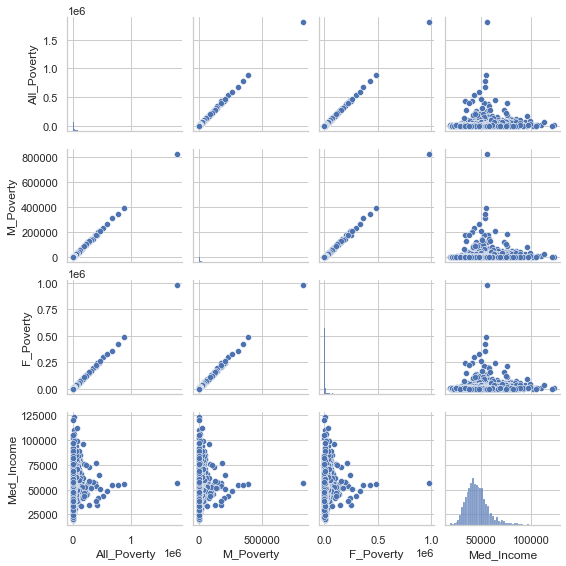

In [130]:
# Pairplot
sns.set(style='whitegrid', context='notebook')
sns.pairplot(fin_df[['All_Poverty', 'M_Poverty', 'F_Poverty', 'Med_Income']], height=2)

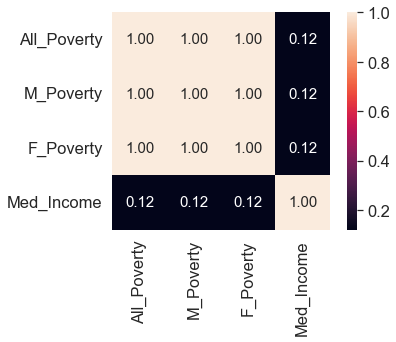

In [131]:
# Correlation Heatmap
cols = ['All_Poverty', 'M_Poverty', 'F_Poverty', 'Med_Income']
cm = fin_df[cols].corr()
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot = True, square=True, fmt='.2f', annot_kws={'size':15},
                yticklabels=cols, xticklabels=cols)

We see that the columns All_Poverty, M and F poverty are very correlated and hence we need to drop two from these !!

In [132]:
fin_df.drop(['M_Poverty', 'F_Poverty'], axis=1, inplace=True)

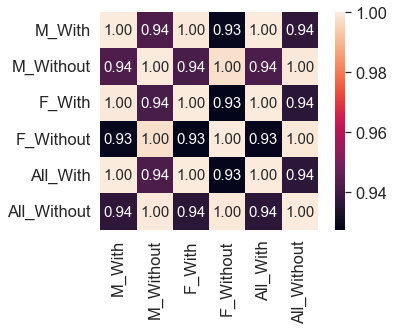

In [133]:
cols = ['M_With', 'M_Without', 'F_With', 'F_Without', 'All_With',
       'All_Without']
cm = fin_df[cols].corr()
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot = True, square=True, fmt='.2f', annot_kws={'size':15},
                yticklabels=cols, xticklabels=cols)

In [134]:
fin_df.drop(['M_With', 'M_Without', 'F_With', 'F_Without'], axis=1, inplace=True)

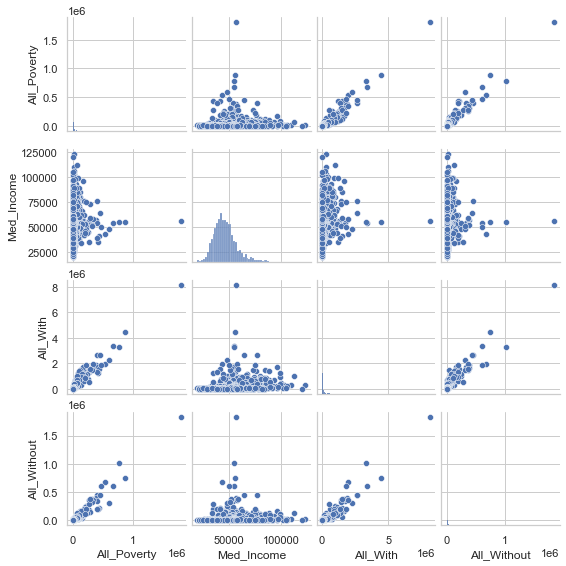

In [135]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(fin_df[['All_Poverty', 'Med_Income', 'All_With',
       'All_Without']], height=2)

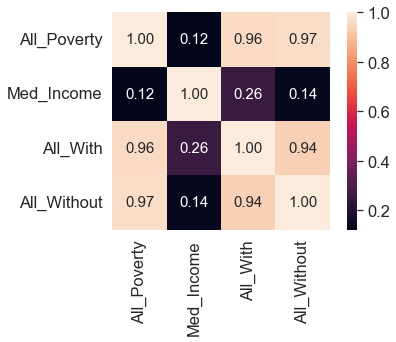

In [136]:
cols = ['All_Poverty', 'Med_Income', 'All_With','All_Without']
cm = fin_df[cols].corr()
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot = True, square=True, fmt='.2f', annot_kws={'size':15},
                yticklabels=cols, xticklabels=cols)

In [137]:
# Scatter Plot
def visualize_scatter_pov(col):
    fig1 = plt.figure(figsize = (14,10))
    
    ax3 = fig1.add_subplot(223)
    fin_df.plot(x = 'Avg_Ann_Deaths', y = col, kind= 'scatter', s=0.1, xlim = [0, 200], ylim = [0, 40000], ax = ax3)
    ax4 = fig1.add_subplot(224)
    fin_df.plot(x = 'Avg_Ann_Incidence', y = col, kind= 'scatter', s=0.1,xlim = [0, 200], ylim = [0, 40000], ax = ax4)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


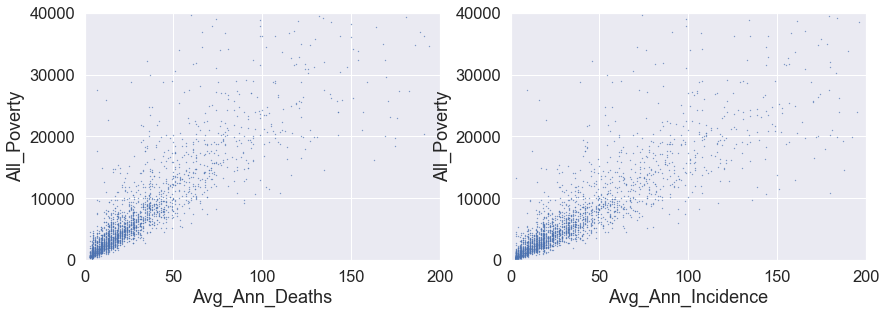

In [138]:
visualize_scatter_pov('All_Poverty')

In [139]:
def visualize_scatter_inc(col):
    fig1 = plt.figure(figsize = (14,10))
    ax3 = fig1.add_subplot(223)
    fin_df.plot(x = 'Avg_Ann_Deaths', y = col, kind= 'scatter',xlim = [0, 200], ylim = [0, 100000], s=0.1, ax = ax3)
    ax4 = fig1.add_subplot(224)
    fin_df.plot(x = 'Avg_Ann_Incidence', y = col, kind= 'scatter', s=0.1,xlim = [0, 200], ylim = [0, 100000], ax = ax4)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


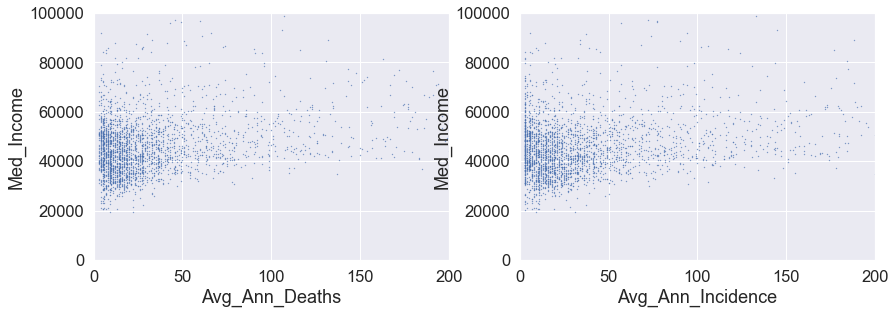

In [140]:
visualize_scatter_inc('Med_Income')

In [141]:
def visualize_scatter_with(col):
    fig1 = plt.figure(figsize = (14,10))
    ax3 = fig1.add_subplot(223)
    fin_df.plot(x = 'Avg_Ann_Deaths', y = col, kind= 'scatter',xlim = [0, 100], ylim = [0, 100000], s=0.1, ax = ax3)
    ax4 = fig1.add_subplot(224)
    fin_df.plot(x = 'Avg_Ann_Incidence', y = col, kind= 'scatter', s=0.1,xlim = [0, 100], ylim = [0, 100000], ax = ax4)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


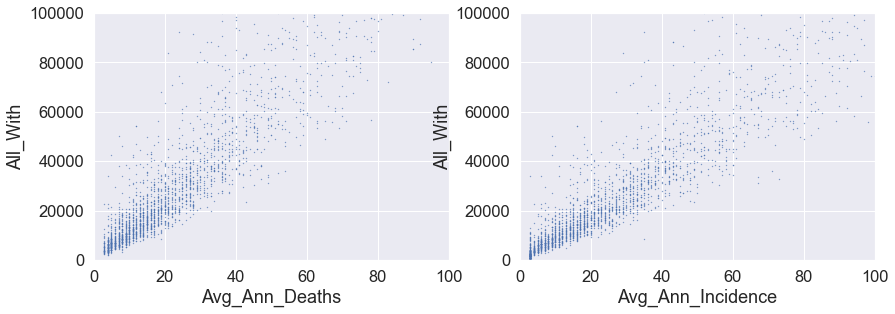

In [142]:
visualize_scatter_with('All_With')

In [143]:
def visualize_scatter_without(col):
    fig1 = plt.figure(figsize = (14,10))
    ax3 = fig1.add_subplot(223)
    fin_df.plot(x = 'Avg_Ann_Deaths', y = col, kind= 'scatter',xlim = [0, 100], ylim = [0, 20000], s=0.1, ax = ax3)
    ax4 = fig1.add_subplot(224)
    fin_df.plot(x = 'Avg_Ann_Incidence', y = col, kind= 'scatter', s=0.1,xlim = [0, 100], ylim = [0, 20000], ax = ax4)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


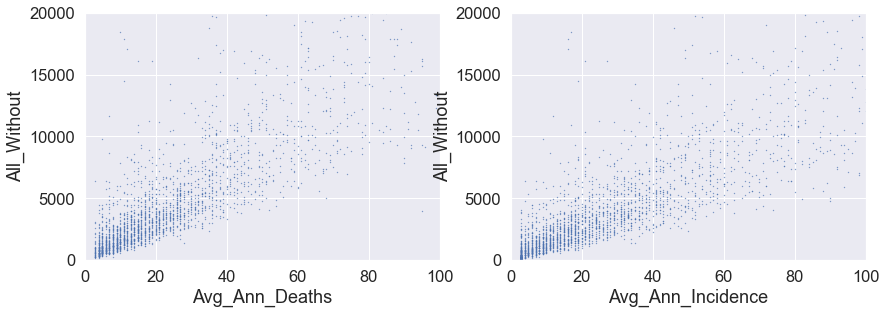

In [144]:
visualize_scatter_without('All_Without')

## Statistical Linear Regression Modelling using Statsmodel Library

Unlike SKLearn, statsmodels doesn’t automatically fit a constant, so you need to use the method sm.add_constant(X) in order to add a constant. Adding a constant, while not necessary, makes your line fit much better. For example, if you have a line with an intercept of -2000 and you try to fit the same line through the origin, you’re going to get an inferior line. Once we add a constant (or an intercept if you’re thinking in line terms), you’ll see that the coefficients are the same in SKLearn and statsmodels.

In [145]:
fin_df.columns

Index(['State', 'AreaName', 'All_Poverty', 'FIPS', 'Med_Income', 'All_With',
       'All_Without', 'Avg_Ann_Incidence', 'recent_trend', 'Avg_Ann_Deaths',
       'Rising', 'Falling'],
      dtype='object')

In [146]:
res = ''
for i in fin_df.columns:
    res += str(i) + ' + ' 
print(res)

State + AreaName + All_Poverty + FIPS + Med_Income + All_With + All_Without + Avg_Ann_Incidence + recent_trend + Avg_Ann_Deaths + Rising + Falling + 


In [147]:
import statsmodels.formula.api as smf

In [148]:
# Using statmodels library for Linear Regression Modelling
model1 = smf.ols(formula='Avg_Ann_Incidence ~ All_Poverty + Med_Income  + All_With + All_Without + Rising + Falling', data=fin_df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:      Avg_Ann_Incidence   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     5707.
Date:                Mon, 06 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:09:39   Log-Likelihood:                -15493.
No. Observations:                2924   AIC:                         3.100e+04
Df Residuals:                    2917   BIC:                         3.104e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      36.8125      3.931      9.365      

In [149]:
# Fitting to Average Deaths
model2 = smf.ols(formula='Avg_Ann_Deaths ~ All_Poverty + Med_Income  + All_With + All_Without + Rising + Falling', data=fin_df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:         Avg_Ann_Deaths   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     5728.
Date:                Mon, 06 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:09:39   Log-Likelihood:                -13977.
No. Observations:                2809   AIC:                         2.797e+04
Df Residuals:                    2802   BIC:                         2.801e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      32.1884      2.948     10.919      

## Multicollinearity

In [150]:
# Importing VIF to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [151]:
X = fin_df[[ 'All_Poverty',  'Med_Income', 'All_With', 'All_Without', 'Rising', 'Falling', 'Avg_Ann_Incidence']]

In [152]:
X.columns

Index(['All_Poverty', 'Med_Income', 'All_With', 'All_Without', 'Rising',
       'Falling', 'Avg_Ann_Incidence'],
      dtype='object')

In [153]:
X.dropna(inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [154]:
X1 = X[['All_Poverty', 'Med_Income', 'All_With', 'All_Without', 'Rising',
       'Falling']]

In [155]:
# Getting the VIFs corresponding to each of the features and then treating the one with the highest value
pd.DataFrame([[var, variance_inflation_factor(X1.values, X1.columns.get_loc(var))] for var in X1.columns],
                   index=range(X1.shape[1]), columns=['Variable', 'VIF'])

,Variable,VIF
0,All_Poverty,25.654166
1,Med_Income,1.271954
2,All_With,15.627624
3,All_Without,16.031002
4,Rising,1.015347
5,Falling,1.201154


We can see that the model suffers from high multicollinearity as the VIF is high for the variable and thus might lead to coefficients that are statistically insignificant !!

In [156]:
X.drop('All_Poverty', axis = 1, inplace=True)
X1.drop('All_Poverty', axis = 1, inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [157]:
pd.DataFrame([[var, variance_inflation_factor(X1.values, X1.columns.get_loc(var))] for var in X1.columns],
                   index=range(X1.shape[1]), columns=['Variable', 'VIF'])

,Variable,VIF
0,Med_Income,1.265045
1,All_With,9.776656
2,All_Without,8.926300
3,Rising,1.015175
4,Falling,1.199055


In [158]:
X.drop('All_Without', axis = 1, inplace=True)
X1.drop('All_Without', axis = 1, inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [159]:
pd.DataFrame([[var, variance_inflation_factor(X1.values, X1.columns.get_loc(var))] for var in X1.columns],
                   index=range(X1.shape[1]), columns=['Variable', 'VIF'])

,Variable,VIF
0,Med_Income,1.207631
1,All_With,1.257105
2,Rising,1.015051
3,Falling,1.193283


In [160]:
# Final model after treating for multicollinearity
model1 = smf.ols(formula='Avg_Ann_Incidence ~Med_Income  + All_With + Rising + Falling', data=fin_df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:      Avg_Ann_Incidence   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     7020.
Date:                Mon, 06 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:09:39   Log-Likelihood:                -15759.
No. Observations:                2924   AIC:                         3.153e+04
Df Residuals:                    2919   BIC:                         3.156e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4731      3.875      6.315      0.0

# Detecting Outliers

In [161]:
fin_df.columns

Index(['State', 'AreaName', 'All_Poverty', 'FIPS', 'Med_Income', 'All_With',
       'All_Without', 'Avg_Ann_Incidence', 'recent_trend', 'Avg_Ann_Deaths',
       'Rising', 'Falling'],
      dtype='object')

In [162]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3134 entries, 0 to 3133
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              3134 non-null   object 
 1   AreaName           3134 non-null   object 
 2   All_Poverty        3134 non-null   int64  
 3   FIPS               3134 non-null   int64  
 4   Med_Income         3133 non-null   float64
 5   All_With           3134 non-null   int64  
 6   All_Without        3134 non-null   int64  
 7   Avg_Ann_Incidence  2925 non-null   float64
 8   recent_trend       3134 non-null   object 
 9   Avg_Ann_Deaths     2809 non-null   float64
 10  Rising             3134 non-null   int64  
 11  Falling            3134 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 382.8+ KB


In [163]:
data_mod1 = fin_df.copy()
#using IQR method
dat = data_mod1['Med_Income']
Q1 = dat.quantile(0.25)
Q3 = dat.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (dat >= Q1 - 3 * IQR) & (dat <= Q3 + 3 *IQR)
data_mod1 = data_mod1.loc[filter]
print(data_mod1.shape)

(3112, 12)


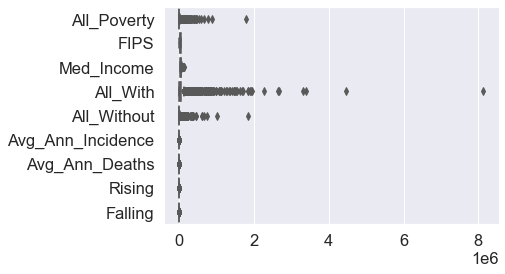

In [164]:
# Boxplot for the initial data
ax = sns.boxplot(data=fin_df, orient="h", palette="Set2")

In [166]:
# Fitting to Average Deaths
model2 = smf.ols(formula='Avg_Ann_Deaths ~ All_Poverty + Med_Income  + All_With + All_Without + Rising + Falling', data=data_mod1).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:         Avg_Ann_Deaths   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     5933.
Date:                Mon, 06 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:09:40   Log-Likelihood:                -13809.
No. Observations:                2788   AIC:                         2.763e+04
Df Residuals:                    2781   BIC:                         2.767e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      30.6782      3.056     10.040      

In [191]:
data_mod1 = fin_df.copy()
for i in ['All_Poverty', 'Med_Income', 'All_With', 'All_Without', 'Rising', 'Falling']:
    #using IQR method
    dat = data_mod1[i]
    Q1 = dat.quantile(0.25)
    Q3 = dat.quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (dat >= Q1 - 3 * IQR) & (dat <= Q3 + 3 *IQR)
    data_mod1 = data_mod1.loc[filter]
    print(data_mod1.shape)

(2563, 12)
(2563, 12)
(2559, 12)
(2553, 12)
(2553, 12)
(2455, 12)


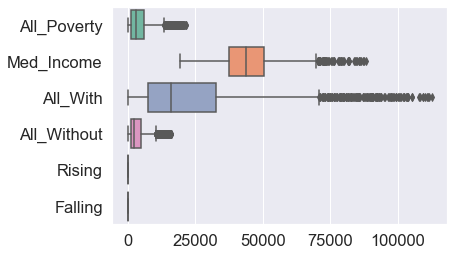

In [197]:
# Boxplot for the filtered data
ax = sns.boxplot(data=data_mod1[['All_Poverty', 'Med_Income', 'All_With', 'All_Without', 'Rising', 'Falling']], orient="h", palette="Set2")

In [198]:
fin_df = data_mod1

In [217]:
# Fitting to Average Deaths
model1 = smf.ols(formula='Avg_Ann_Deaths ~ All_Poverty + Med_Income  + All_With + All_Without + Rising + Falling', data=data_mod1).fit()

## Normality of Errors

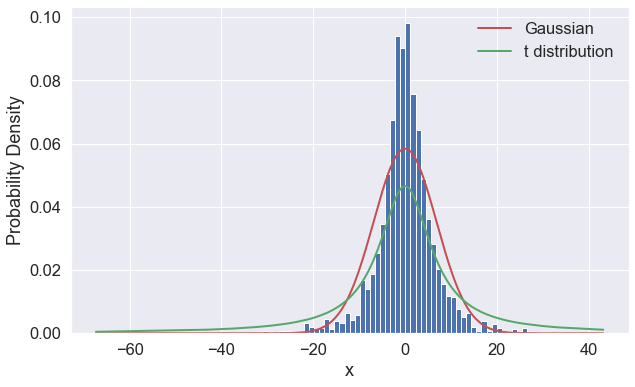

In [210]:
# histogram superimposed by normal curve
plt.figure(figsize=(10,6))
import scipy.stats as stats
mu = np.mean(model1.resid)
sigma = np.std(model1.resid)
pdf = stats.norm.pdf(sorted(model1.resid), mu, sigma)
pdf2 = stats.t.pdf(sorted(model1.resid), df = 1, loc = mu, scale=sigma,)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.hist(model1.resid, bins=100, density= True)
plt.plot(sorted(model1.resid), pdf, color='r', linewidth=2, label = 'Gaussian')
plt.plot(sorted(model1.resid), pdf2, color='g', linewidth=2, label = 't distribution')
plt.legend()
plt.show()

In [211]:
import statsmodels.graphics.gofplots as sm

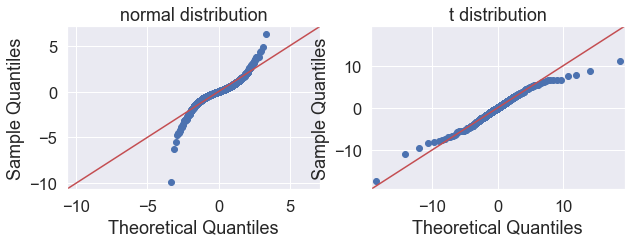

In [212]:
# QQplot
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10,3))
sm.qqplot(model1.resid, stats.norm, fit=True, line='45', ax=ax1)
ax1.set_title("normal distribution")
sm.qqplot(model1.resid, stats.t, fit=True, line='45', ax = ax2)
ax2.set_title("t distribution")

plt.show()

### As we can see that the QQ plot for the normal distribution is not close to the straight line at the ends and it deviates to the top at the right and to the bottom at the left, we can say that the tails for the residuals are heavier than a normal distribution, hence on following that I tried using a t distribution, which gives a much better QQ plot and hence we can confirm that the residuals come from the t distribution !! Fatter tails suggest we have more number of outliers !

In [223]:
result = model1

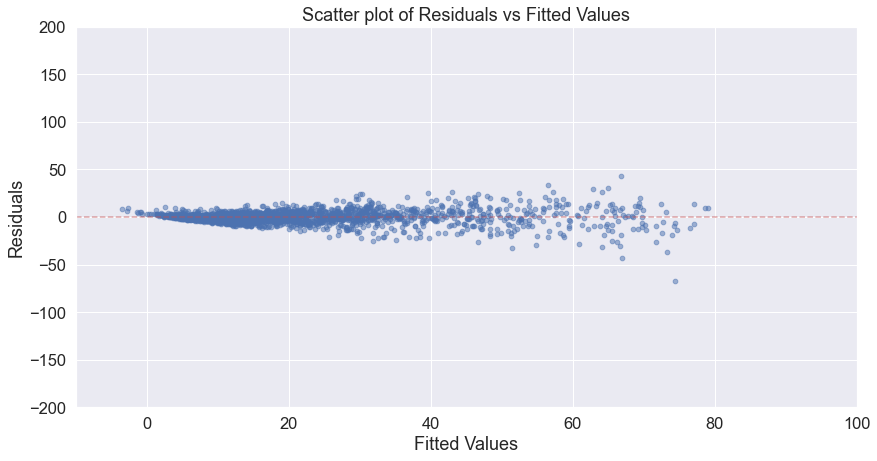

In [227]:
# plot actual values versus residuals
plt.figure(figsize=(14,7))
plt.title('Scatter plot of Residuals vs Fitted Values')
plt.scatter(y=result.resid, x=result.fittedvalues, alpha=0.5, s=22)
plt.axhline(y=0, color='r', linestyle="--", alpha=0.5)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.xlim(-10, 100)
plt.ylim(-200, 200)
plt.show()

We can see a cone shaped residual plot which is common in cases of heteroscadasticity wherein when the fitted value increases, the variance also increases. Hence our model suffers from high heteroscadasticity. 

Heteroscedasticity is a systematic change in the spread of the residuals over the range of measured values. Heteroscedasticity is a problem because ordinary least squares (OLS) regression assumes that all residuals are drawn from a population that has a constant variance (homoscedasticity). Heteroscedasticity, also spelled heteroskedasticity, occurs more often in datasets that have a large range between the largest and smallest observed values. While there are numerous reasons why heteroscedasticity can exist, a common explanation is that the error variance changes proportionally with a factor. This factor might be a variable in the model.

While heteroscedasticity does not cause bias in the coefficient estimates, it does make them less precise. Lower precision increases the likelihood that the coefficient estimates are further from the correct population value.
Heteroscedasticity tends to produce p-values that are smaller than they should be. This effect occurs because heteroscedasticity increases the variance of the coefficient estimates but the OLS procedure does not detect this increase. Consequently, OLS calculates the t-values and F-values using an underestimated amount of variance. This problem can lead you to conclude that a model term is statistically significant when it is actually not significant.